In [5]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#importing functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

#importing Classification ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier




In [6]:
#style for the visualizations
sns.set_style('darkgrid')

In [7]:
#Data Collection

In [8]:
project_data =pd.read_csv(r"/content/kickstarter_projects.csv")

2. Data Cleaning

In [9]:
project_data.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000.0,625.0,30.0,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000.0,22.0,3.0,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20.0,35.0,3.0,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99.0,145.0,25.0,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900.0,387.0,10.0,Failed


In [10]:
project_data.columns

Index(['ID', 'Name', 'Category', 'Subcategory', 'Country', 'Launched',
       'Deadline', 'Goal', 'Pledged', 'Backers', 'State'],
      dtype='object')

In [11]:
df=project_data.copy()

In [12]:
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000.0,625.0,30.0,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000.0,22.0,3.0,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20.0,35.0,3.0,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99.0,145.0,25.0,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900.0,387.0,10.0,Failed


In [13]:
#2) Statistical analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78331 entries, 0 to 78330
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           78331 non-null  int64  
 1   Name         78330 non-null  object 
 2   Category     78330 non-null  object 
 3   Subcategory  78330 non-null  object 
 4   Country      78330 non-null  object 
 5   Launched     78330 non-null  object 
 6   Deadline     78330 non-null  object 
 7   Goal         78330 non-null  float64
 8   Pledged      78330 non-null  float64
 9   Backers      78330 non-null  float64
 10  State        78330 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 6.6+ MB


In [14]:
df.shape

(78331, 11)

In [15]:
#summary statistics rounded off to 1 decimal place
df.describe().round(1)

,ID,Goal,Pledged,Backers
count,7.833100e+04,78330.0,78330.0,78330.0
mean,1.076922e+09,16340.7,5777.1,78.1
std,6.195183e+08,233464.8,63756.8,731.2
min,5.971000e+03,0.0,0.0,0.0
25%,5.408185e+08,2000.0,110.0,3.0
50%,1.075588e+09,5000.0,1035.0,19.0
75%,1.614837e+09,10000.0,3970.0,57.0
max,2.147460e+09,21474836.0,10266846.0,87142.0


In [16]:
#3) Handling null values

In [17]:
df.isnull().sum()

,0
ID,0
Name,1
Category,1
Subcategory,1
Country,1
Launched,1
Deadline,1
Goal,1
Pledged,1
Backers,1


In [18]:
#Removing rows which contain null value. We require information about the category of the project.
df = df.dropna()


In [19]:
df.isnull().sum()

,0
ID,0
Name,0
Category,0
Subcategory,0
Country,0
Launched,0
Deadline,0
Goal,0
Pledged,0
Backers,0


In [20]:
df['State'].unique().tolist()

['Failed', 'Successful', 'Canceled', 'Suspended']

In [21]:
#The purpose of the model is to determine wether the project will fail or be successful.
#4) Thus only the data related to failed or successful projects will be used for training.

df = df[(df['State'] == 'Successful') | (df['State'] == 'Failed')]



In [22]:
df['State'].unique().tolist()

['Failed', 'Successful']

In [23]:
df.drop(columns=['ID'], inplace=True)

In [24]:
#Saved cleaned data to an excel file. This excel file is used for data analysis in PowerBI.
#set the file path where you want to save the Excel file
# file_path = r'C:\Users\HOME\Desktop\Kickstarter project\my_data1.xlsx'

# # write the data frame to an Excel file
# df.to_excel(file_path, index=False)

# print(f"Data frame saved as Excel file to {file_path}")


Data Preprocessing

In [25]:
#Making the data less complex by extracting the date from deadline and launched at columns

In [26]:
df.head()

,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000.0,625.0,30.0,Failed
1,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000.0,22.0,3.0,Failed
2,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20.0,35.0,3.0,Successful
3,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99.0,145.0,25.0,Successful
4,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900.0,387.0,10.0,Failed


In [27]:
# Convert 'Deadline' to datetime
df['Deadline'] = pd.to_datetime(df['Deadline'])

df['Launched'] = pd.to_datetime(df['Launched'])

In [28]:
df.dtypes

,0
Name,object
Category,object
Subcategory,object
Country,object
Launched,datetime64[ns]
Deadline,datetime64[ns]
Goal,float64
Pledged,float64
Backers,float64
State,object


In [29]:
#Label encoding

In [30]:
# Define categorical columns for label encoding
categorical_cols = ['Name','Category', 'Subcategory', 'Country', 'State']

# Initialize LabelEncoder
label_encoders = {}

# Apply Label Encoding
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Display updated DataFrame
print(df.head())
print(df.dtypes)

    Name  Category  Subcategory  Country            Launched   Deadline  \
0  25938         5           36        1 2009-04-21 21:02:48 2009-05-31   
1  13909         6           96        1 2009-04-23 00:07:53 2009-07-20   
2  71131         0           52        1 2009-04-24 21:52:03 2009-05-03   
3  42566        13           97        1 2009-04-25 17:36:21 2009-07-14   
4  44129         5           36        1 2009-04-27 14:10:39 2009-05-26   

      Goal  Pledged  Backers  State  
0   1000.0    625.0     30.0      0  
1  80000.0     22.0      3.0      0  
2     20.0     35.0      3.0      1  
3     99.0    145.0     25.0      1  
4   1900.0    387.0     10.0      0  
Name                    int64
Category                int64
Subcategory             int64
Country                 int64
Launched       datetime64[ns]
Deadline       datetime64[ns]
Goal                  float64
Pledged               float64
Backers               float64
State                   int64
dtype: object


Text(0.5, 1.0, 'Fig 2: Correlation Matrix')

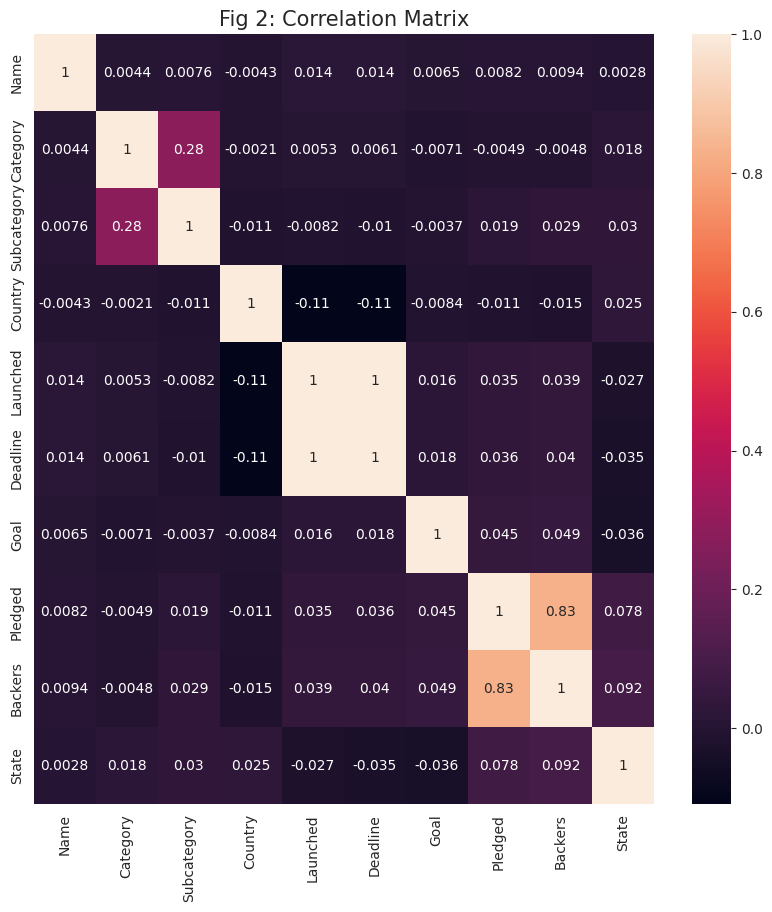

In [31]:
#Fig 2: correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Fig 2: Correlation Matrix',fontsize=15)


In [32]:
# # Define columns for pairplot
# pairplot_cols = ['Goal', 'Backers', 'Pledged', 'State']  # Adjusted column names to match your dataset
# pairplot_df = df[pairplot_cols]

# # Plot the pairplot
# plt.figure(figsize=(15, 15))
# sns.pairplot(data=pairplot_df, hue='State')  # Using 'State' as the hue
# plt.suptitle('Fig 3: Pairplot', fontsize=15, y=1.03, horizontalalignment='center')
# plt.show()

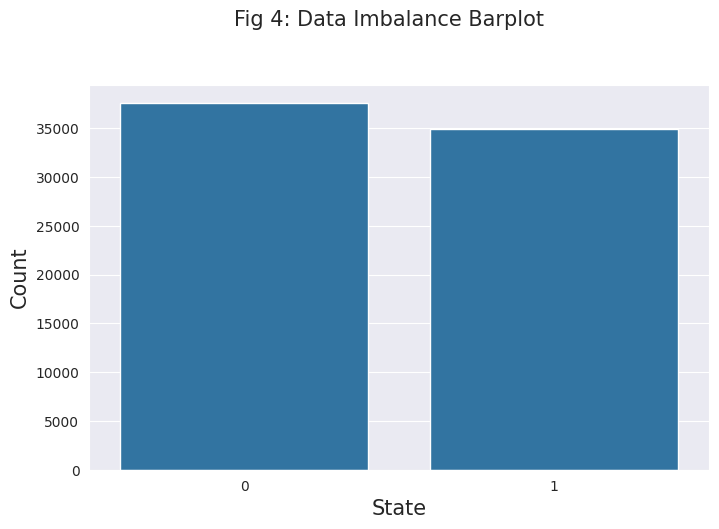

In [33]:
# Check class imbalance
pot_lbl = df['State'].value_counts()

# Fig 4: Data imbalance barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=pot_lbl.index, y=pot_lbl.values)  # Explicitly using values for y
plt.xlabel('State', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.suptitle('Fig 4: Data Imbalance Barplot', fontsize=15, y=1.03, horizontalalignment='center')
plt.show()


In [34]:
#As the Data imbalance is not large it does not need to be fixed
#It will need to be taken into consideration during evaluating the ML model which will be used on the data

Data Preparation

In [35]:
# 1.Train test split

from sklearn.model_selection import train_test_split

# Define the features (independent variables) and the target variable
X = df.drop('State', axis=1)
y = df['State']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [36]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (50707, 9)
X_test shape:  (21732, 9)


In [37]:
#2. Feature engineering

In [38]:
df.dtypes

,0
Name,int64
Category,int64
Subcategory,int64
Country,int64
Launched,datetime64[ns]
Deadline,datetime64[ns]
Goal,float64
Pledged,float64
Backers,float64
State,int64


In [39]:
from sklearn.preprocessing import StandardScaler

# Convert datetime columns to numerical values (timestamp)
datetime_cols = ['Launched', 'Deadline']  # Adjust column names if necessary

for col in datetime_cols:
    X_train[col] = X_train[col].astype('int64') // 10**9  # Convert to UNIX timestamp
    X_test[col] = X_test[col].astype('int64') // 10**9

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, transform the test data
scaler.fit_transform(X_train)
scaler.transform(X_test)



array([[-1.42537765, -2.00183628, -1.7593828 , ..., -0.06331852,
        -0.05757123, -0.01991687],
       [-0.71878125,  1.68028395,  1.39063455, ..., -0.06331852,
        -0.05901759, -0.03953868],
       [ 0.69517735,  1.15426677, -0.76294874, ...,  0.01838771,
        -0.09465343, -0.10330956],
       ...,
       [-0.16094199, -0.42378476,  0.20134229, ..., -0.05804715,
        -0.09388409, -0.10208319],
       [ 0.43413442,  1.68028395,  1.39063455, ..., -0.06331852,
        -0.06341822, -0.07387684],
       [ 1.69895298,  1.41727536,  1.32634848, ..., -0.02641893,
        -0.09226848, -0.07755593]])

In [80]:
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd

# Convert datetime columns to numerical format (e.g., timestamps)
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].astype(int)  # Converts datetime to integer (timestamp)

# Train the Extra Trees Classifier
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importance scores
feature_importance = pd.Series(model.feature_importances_, index=X.columns)

print(feature_importance)

# Define a threshold for feature importance score
threshold = 0.04

# Select features to drop
to_drop = feature_importance[feature_importance < threshold].index.tolist()

# Drop the less important features
df_selected = X.drop(columns=to_drop, axis=1)

# Print results
print("Dropped Features:", to_drop)
print("Selected Features:", df_selected.columns.tolist())


Name           0.032274
Category       0.036117
Subcategory    0.033374
Country        0.000711
Launched       0.033737
Deadline       0.033996
Goal           0.199189
Pledged        0.313800
Backers        0.316802
dtype: float64
Dropped Features: ['Name', 'Category', 'Subcategory', 'Country', 'Launched', 'Deadline']
Selected Features: ['Goal', 'Pledged', 'Backers']


In [81]:
df1=df_selected.copy()

In [82]:
df1.head()

,Goal,Pledged,Backers
0,1000.0,625.0,30.0
1,80000.0,22.0,3.0
2,20.0,35.0,3.0
3,99.0,145.0,25.0
4,1900.0,387.0,10.0


In [43]:
df1.dtypes

,0
Goal,float64
Pledged,float64
Backers,float64


In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from joblib import Parallel, delayed  # For parallel processing

# Define the list of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree'),  # Faster than kd_tree
    "Random Forest": RandomForestClassifier(n_estimators=30, n_jobs=-1, warm_start=True),  # Fewer trees
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=30, subsample=0.8)
}

# Function to train and evaluate a model
def evaluate_model(model_name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    # Calculate performance metrics
    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    # Compute ROC-AUC only if `predict_proba` is available
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else None

    return model_name, acc, prec, recall, f1, roc_auc

# Run models in parallel
results = Parallel(n_jobs=-1)(delayed(evaluate_model)(name, model, X_train, X_test, y_train, y_test) for name, model in models.items())

# Convert results into a DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"])
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.912801   0.883427  0.943308  0.912386  0.969446
1                  KNN  0.557197   0.541211  0.525430  0.533204  0.572831
2        Random Forest  0.996871   0.994104  0.999426  0.996758  0.999850
3          Naive Bayes  0.636895   0.950860  0.258987  0.407093  0.780954
4    Gradient Boosting  0.976624   0.959295  0.993595  0.976144  0.998641


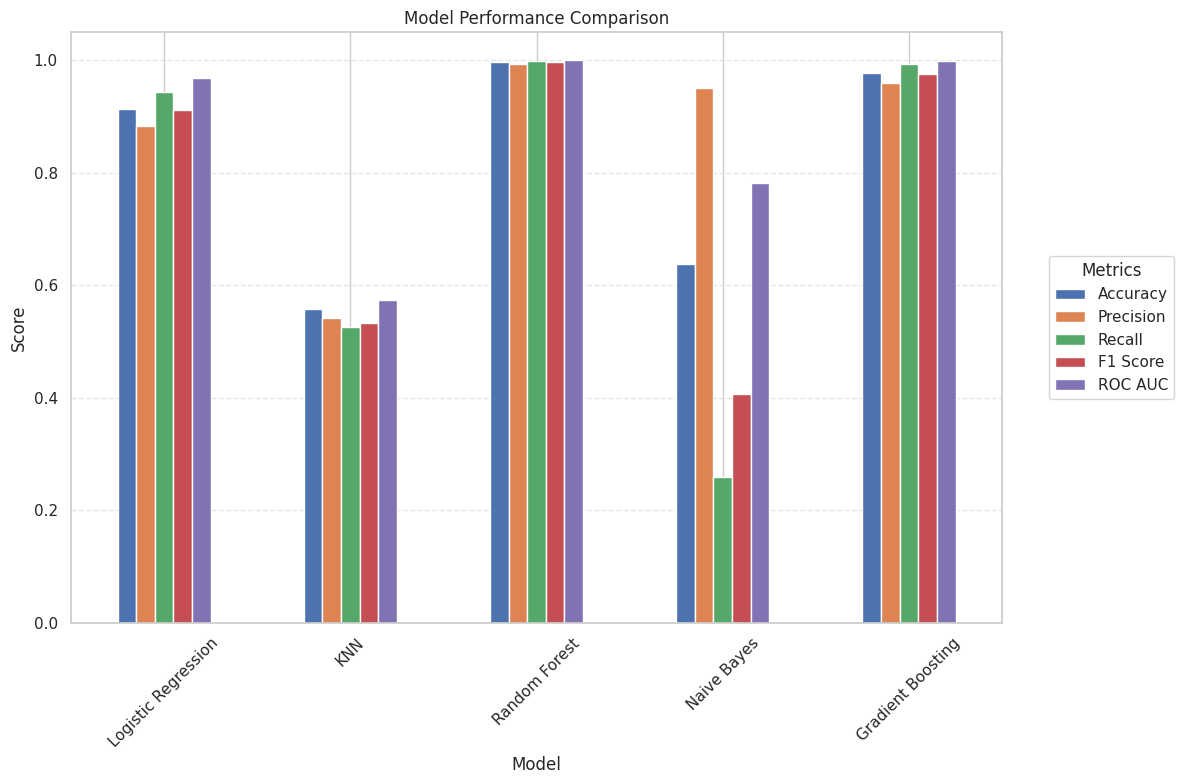

In [75]:
import matplotlib.pyplot as plt

# Plot the performance metrics as a grouped bar chart
results_df.set_index("Model").plot(kind="bar", figsize=(12, 8))

# Add chart details
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Move legend to the right of the chart
plt.legend(title="Metrics", fontsize=11, title_fontsize=12, bbox_to_anchor=(1.05, 0.5), loc="center left", borderaxespad=0)

# Show the plot
plt.tight_layout()
plt.show()


In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Define the model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42)

# Stratified K-Fold Cross Validation (for class balance)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Compute Cross-Validation Scores
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy')

# Print Results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")


Cross-Validation Accuracy Scores: [0.99428121 0.99457701 0.99457647 0.99497091 0.99595701]
Mean CV Accuracy: 0.9949
Standard Deviation: 0.0006


In [77]:
rf_model.fit(X_train, y_train)
train_acc = rf_model.score(X_train, y_train)
test_acc = rf_model.score(X_test, y_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Training Accuracy: 0.9979
Test Accuracy: 0.9952


In [79]:
# The Random Forest model performs exceptionally well with high accuracy (99%)
#and strong generalization, indicating minimal overfitting.
#The near-perfect recall (99%) suggests it effectively captures almost all positive cases, making it highly reliable.